# Point Estimators, Summarizing the Posterior Distributions, Credible Intervals in Bayesian Statistics (with example of Binomial Distributions of a 2-State problem)

### Pratical demonstration of computation of prior, likelihood and posterior distribution in Bayesian statistics for the CNM coursework in SINP during Fall 2022 by Arunava Mukherjee (12 September 2022, class 4)

#### 
 *  This program is free software; you can redistribute it and/or modify
 *  it under the terms of the GNU General Public License as published by
 *  the Free Software Foundation; either version 2 of the License, or
 *  (at your option) any later version.
 *
 *  This program is distributed in the hope that it will be useful,
 *  but WITHOUT ANY WARRANTY; without even the implied warranty of
 *  MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
 *  GNU General Public License for more details.
 *
 *  You should have received a copy of the GNU General Public License
 *  along with with program; see the file COPYING. If not, write to the
 *  Free Software Foundation, Inc., 59 Temple Place, Suite 330, Boston,
 *  MA  02111-1307  USA.

**(c) Arunava Mukherjee, 2022**

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

#### Define a function for factorial of a number 

In [2]:
def factorial(n):
    factr = 1
    for i in range(n):
        factr *= (i+1)
        
    return factr

In [3]:
n = 5
factorial(n)

120

#### Define functions for permutations and combinations 

In [4]:
def n_permn_r(n, r):
    nPr = factorial(n)/factorial(n - r)
    
    return nPr

def n_combn_r(n, r):
    nCr = factorial(n)/(factorial(r) * factorial(n - r))
    
    return nCr

In [5]:
n, r = 5, 2
n_combn_r(n, r)

10.0

### Define probability of binomial distribution

In [6]:
def P_BinomialDist(N, X, theta):
    #prob = n_combn_r(N, X) * (theta**X) * ((1.0 - theta)**(N - X))
    prob = (theta**X) * ((1.0 - theta)**(N - X))
    
    return prob

#### Test it with a specific choice of `N`, `x` and parameter ($\theta$)

In [7]:
N, X = 5, 2

In [8]:
theta = (X/N)
P_BinomialDist(N, X, theta)

0.03456

In [9]:
# save it as the true value
theta_true = theta

### Define the set of all hypotheses ($H_i$) as different parameter ($\theta$) values

In [10]:
num_pts = 101    # (change this as needed!)
print('Number of points are:', num_pts)

Number of points are: 101


In [11]:
theta_arr = np.linspace(0.0, 1.0, num_pts)
print(r'theta values are: ', theta_arr)

theta values are:  [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]


### Define prior values for all the hypotheses ($P(\theta)$)

### Consider uniform (or flat) prior distribution

In [12]:
prior_arr = np.zeros_like(theta_arr) + (1.0/len(theta_arr))
#print ('prior_arr :', prior_arr)

### Consider ''Emphasizing the intermediate" prior distribution

prior_arr = np.zeros_like(theta_arr) + (theta_arr**0.5) * ((1.0 - theta_arr)**0.5)
prior_norm = np.sum(prior_arr)
prior_arr /= prior_norm
#print ('prior_arr :', prior_arr)

### Consider ''Emphasizing the Extremes" prior distribution

idx = np.where((theta_arr > 0.0) & (theta_arr < 1.0))
theta_arr = theta_arr[idx]
#print('idx :', idx)

prior_arr = (theta_arr**(-0.5)) * ((1.0 - theta_arr)**(-0.5))
prior_norm = np.sum(prior_arr)
prior_arr /= prior_norm
#print ('prior_arr :', prior_arr)

### Consider informative prior distribution

#### Consider here $\theta$ is known to be 0.5

Success_prior, Unsuccess_prior = 100, 150    # correct guess
#Success_prior, Unsuccess_prior = 100, 100    # incorrect guess
prior_arr = np.zeros_like(theta_arr) + (theta_arr**Success_prior) * ((1.0 - theta_arr)**Unsuccess_prior)
prior_norm = np.sum(prior_arr)
prior_arr /= prior_norm
#print ('prior_arr :', prior_arr)

#### check the sum of all prior values

In [13]:
sum_prior = np.sum(prior_arr)
print ('sum of all the prior values =', sum_prior)

sum of all the prior values = 0.9999999999999999


#### plot the prior distribution

Text(0, 0.5, '$P(\\theta)$')

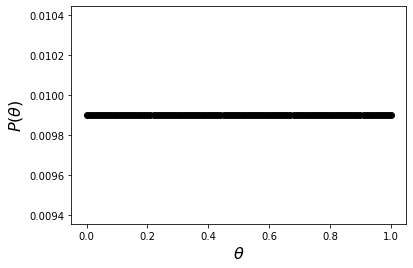

In [14]:
plt.plot(theta_arr, prior_arr, 'ko')
plt.xlabel(r'$\theta$', fontsize=16)
plt.ylabel(r'$P(\theta)$', fontsize=16)

### Define likelihood for all the hypotheses ($P(D | \theta)$)

In [15]:
likelihood_arr = np.zeros_like(theta_arr)    # initialize
i = 0
for theta in theta_arr:
    likelihood_arr[i] = P_BinomialDist(N, X, theta)
    i += 1
    
#print ('likelihood_arr:', likelihood_arr)

#### check the sum of all likelihood values

In [16]:
sum_likelihood = np.sum(likelihood_arr)
print ('sum of all the likelihood values =', sum_likelihood)

sum of all the likelihood values = 1.66666665


#### plot the likelihood distribution

Text(0, 0.5, '$P(D | \\theta)$')

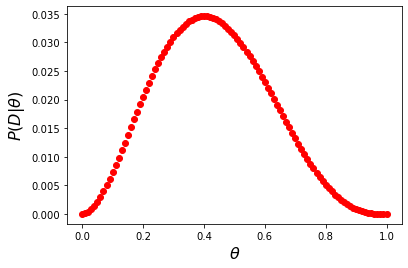

In [17]:
plt.plot(theta_arr, likelihood_arr, 'ro')
plt.xlabel(r'$\theta$', fontsize=16)
plt.ylabel(r'$P(D | \theta)$', fontsize=16)

In [18]:
sum_likelihood = np.sum(likelihood_arr)
print ('sum of all the likelihood values =', sum_likelihood)

sum of all the likelihood values = 1.66666665


### Define unnormalized posterior values ($h_i$) for all the hypotheses ($P(D | \theta)$)

In [19]:
h_arr = (prior_arr * likelihood_arr)
#print ('Array of unnormalized posterior values (h_i) :', h_arr)

#### check the sum of all unnormalized posterior ($h_i = h(\theta)$) values

In [20]:
sum_h = np.sum(h_arr)
print ('sum of all the unnormalized posterior values =', sum_h)

sum of all the unnormalized posterior values = 0.016501649999999996


#### plot the unnormalized posterior ($h_i = h(\theta)$) distribution

Text(0, 0.5, '$h_i = h(\\theta)$')

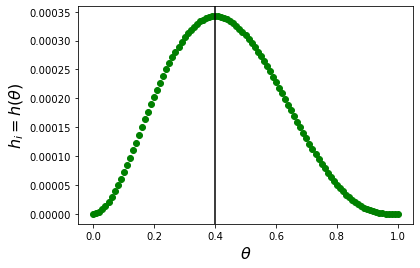

In [21]:
plt.plot(theta_arr, h_arr, 'go')
plt.axvline(x = theta_true, color='k', label='True value')
plt.xlabel(r'$\theta$', fontsize=16)
plt.ylabel(r'$h_i = h(\theta)$', fontsize=16)

### Define posterior values ($P(\theta | D)$) for all the hypotheses

In [22]:
posterior_arr = (h_arr/sum_h)
#print ('array of posterior values :', posterior_arr)

#### check the sum of all posterior values ($P(\theta | D)$) for all the hypotheses

In [23]:
sum_posterior = np.sum(posterior_arr)
print ('sum of all the posterior values =', sum_posterior)

sum of all the posterior values = 1.0000000000000002


#### plot the posterior ($P(\theta | D)$) distribution

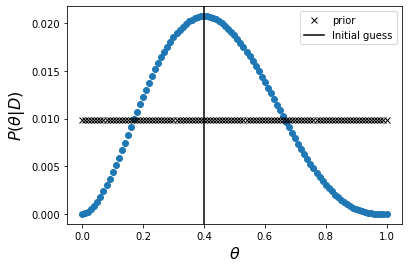

In [24]:
plt.plot(theta_arr, posterior_arr, 'o')
plt.plot(theta_arr, prior_arr, 'kx', label='prior')
plt.axvline(x = theta_true, color='k', label='Initial guess')
plt.xlabel(r'$\theta$', fontsize=16)
plt.ylabel(r'$P(\theta | D)$', fontsize=16)
plt.legend()

### Check the data used for this problem: 
#### `N` : Number of trials, `X` : number of correct outcomes

In [25]:
print ('Number of trials (N) = %d, and number of correct outcomes (X) = %d, and true success probability (theta) = %g'%(N, X, theta_true))

Number of trials (N) = 5, and number of correct outcomes (X) = 2, and true success probability (theta) = 0.4


### Plot the changes from prior to posterior probability distribution of theta

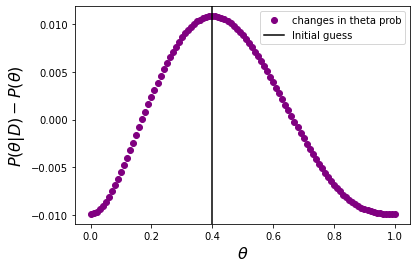

In [26]:
theta_change_arr = (posterior_arr - prior_arr)
plt.plot(theta_arr, theta_change_arr, 'o', color='purple', label='changes in theta prob')
plt.axvline(x = theta_true, color='k', label='Initial guess')
plt.xlabel(r'$\theta$', fontsize=16)
plt.ylabel(r'$P(\theta | D) - P(\theta)$', fontsize=16)
plt.legend()

## Computing point estimates from posterior distributions samples 

#### computing mean

In [27]:
posterior_mean = np.sum(theta_arr * posterior_arr)
print ('posterior_mean =', posterior_mean)

posterior_mean = 0.42857144285571447


#### computing mode

In [28]:
idx_mode = np.where(posterior_arr == np.max(posterior_arr))
print ('idx_mode =', idx_mode)
posterior_mode = theta_arr[idx_mode]
print ('posterior_mode =', posterior_mode)

idx_mode = (array([40]),)
posterior_mode = [0.4]


#### computing median

In [29]:
posterior_cdf = np.cumsum(posterior_arr)
dist = abs(posterior_cdf - 0.5)
idx_median = np.where(dist == np.min(dist))
print ('idx_median =', idx_median)

posterior_median = theta_arr[idx_median]
print ('posterior_median =', posterior_median)

idx_median = (array([42]),)
posterior_median = [0.42]


### Computing Credible interval

#### computing credible interval [a, b] for the value $\alpha$

In [30]:
alpha = 0.9    # for 90% credible interval
lower_cdf = (1.0 - alpha)/2.0
upper_cdf = (1.0 - lower_cdf)

print ('lower cdf = %g, and upper cdf = %g for credible interval of %g%%.'%(lower_cdf, upper_cdf, (alpha*100.0)))

lower cdf = 0.05, and upper cdf = 0.95 for credible interval of 90%.


In [31]:
# find lower bound (a)
dist_low = abs(posterior_cdf - lower_cdf)
idx_lower_cdf = np.where(dist_low == np.min(dist_low))
#print ('idx_lower_cdf =', idx_lower_cdf)
theta_a = theta_arr[idx_lower_cdf]

# find lower bound (b)
dist_up = abs(posterior_cdf - upper_cdf)
idx_upper_cdf = np.where(dist_up == np.min(dist_up))
#print ('idx_upper_cdf =', idx_upper_cdf)
theta_b = theta_arr[idx_upper_cdf]

print ('The required confidence interval is: theta = [%g, %g]'%(theta_a, theta_b))

The required confidence interval is: theta = [0.15, 0.72]


#### plot the credible interval of the parameter ($\theta$) in posterior distribution

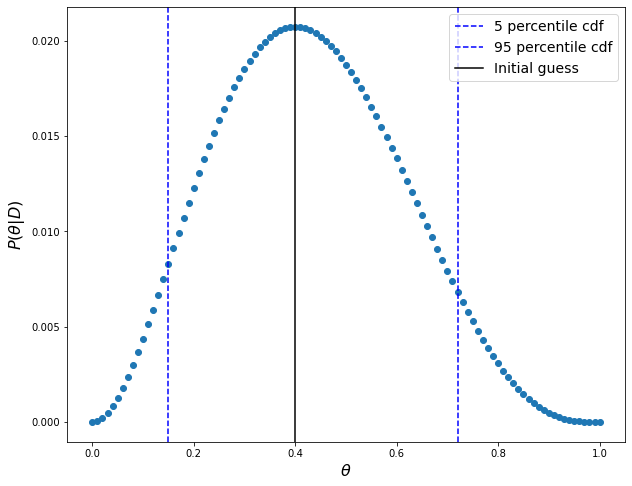

In [32]:
plt.figure(figsize=(10, 8))
plt.plot(theta_arr, posterior_arr, 'o')
plt.axvline(x = theta_a, color='b', linestyle='--', label='5 percentile cdf')
plt.axvline(x = theta_b, color='b', linestyle='--', label='95 percentile cdf')
plt.axvline(x = theta_true, color='k', label='Initial guess')
plt.xlabel(r'$\theta$', fontsize=16)
plt.ylabel(r'$P(\theta | D)$', fontsize=16)
plt.legend(fontsize=14)

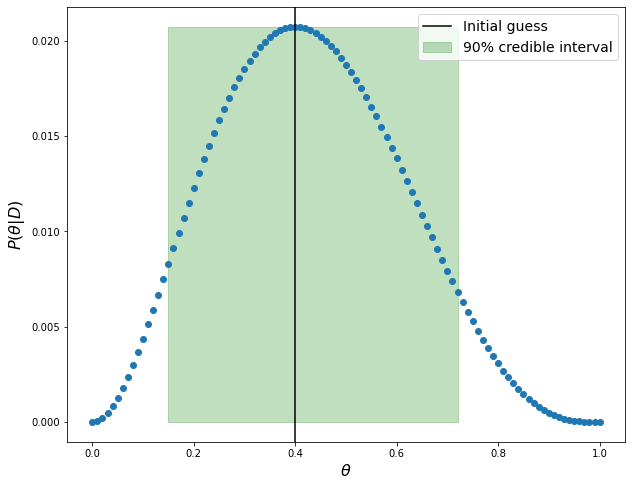

In [33]:
post_top = np.max(posterior_arr)
theta_Yarr = np.linspace(0.0, post_top, 100)
theta_a_vline = theta_a + np.zeros(len(theta_Yarr))
theta_b_vline = theta_b + np.zeros(len(theta_Yarr))

plt.figure(figsize=(10, 8))
plt.plot(theta_arr, posterior_arr, 'o')
plt.fill_betweenx(theta_Yarr, theta_a_vline, theta_b_vline, color='g', alpha=0.25, label='%g%% credible interval'%(100.0 * alpha))
plt.axvline(x = theta_true, color='k', label='Initial guess')
plt.xlabel(r'$\theta$', fontsize=16)
plt.ylabel(r'$P(\theta | D)$', fontsize=16)
plt.legend(fontsize=14)